In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [95]:
with np.load("C:\\Users\\Денис\\Desktop\\вычфиз\\data.npz") as data:
    A, C = data['A'], data['C']

In [18]:
print(A.shape, C.shape)

(25, 60) (1500, 816)


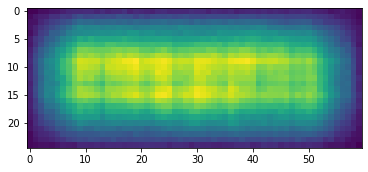

In [14]:
plt.imshow(A)

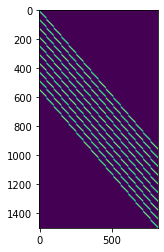

In [33]:
plt.imshow(C)

In [22]:
def mat2vec(A):
    h, w = A.shape
    a = np.zeros(h * w ,dtype = A.dtype)
    A = np.flipud(A)
    for i ,row in enumerate(A):
        a [i*w : i*w + w ] = row
    return a
def vec2mat(a ,shape):
    h ,w = shape
    A = np.zeros(shape, dtype = a.dtype)
    for i in range(h):
        A [i,:] = a[i*w : i*w + w]
    return np.flipud(A)

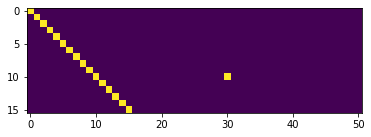

In [31]:
A_test = np.eye(16,51)
A_test[10,30] = 1
plt.imshow(A_test)

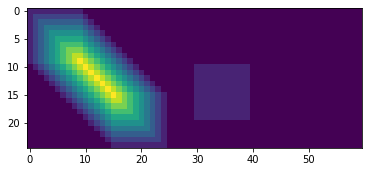

In [32]:
A_test_v = mat2vec(A_test)
new_A_v = C @ A_test_v
new_A = vec2mat(new_A_v ,(25,60))
plt.imshow(new_A)

0.0
0.02631578947368421
0.05263157894736842
0.07894736842105263
0.10526315789473684
0.13157894736842105
0.15789473684210525
0.18421052631578946
0.21052631578947367
0.23684210526315788
0.2631578947368421
0.2894736842105263
0.3157894736842105
0.3421052631578947
0.3684210526315789
0.39473684210526316
0.42105263157894735
0.4473684210526315
0.47368421052631576
0.5


<ipython-input-94-d88b9d117bb0>:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


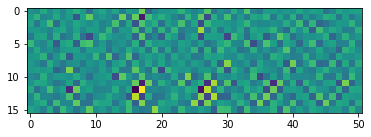

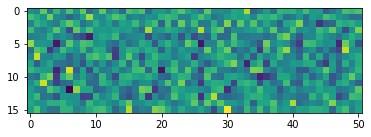

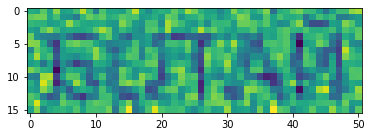

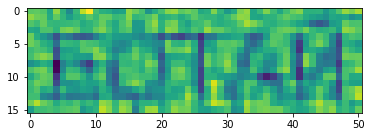

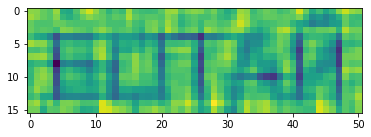

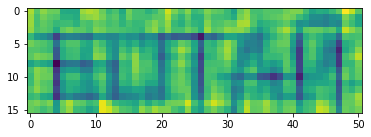

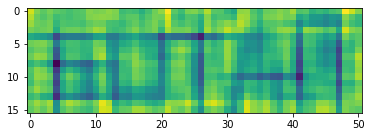

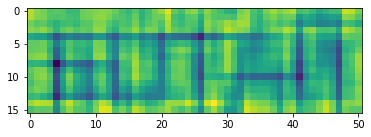

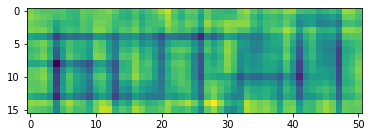

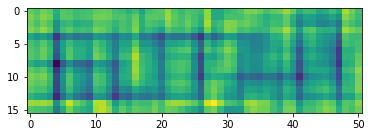

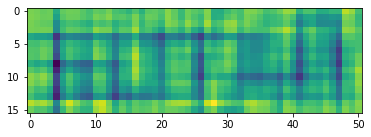

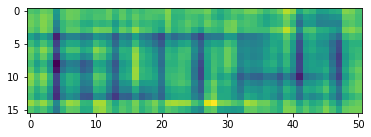

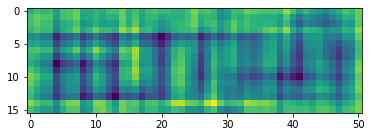

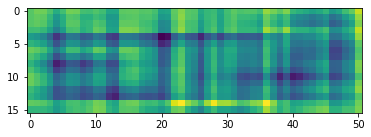

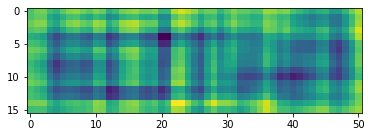

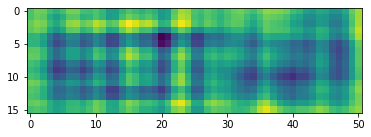

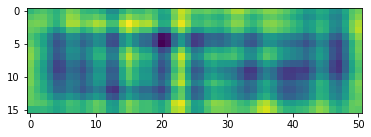

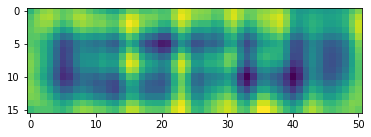

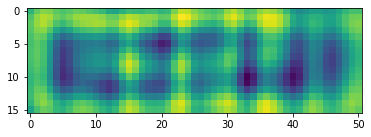

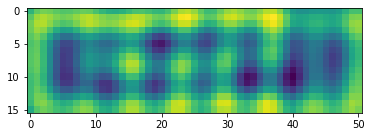

<Figure size 432x288 with 0 Axes>

In [94]:
U, M_v, Vh = np.linalg.svd(C)

for delta in np.linspace(0, 0.5, 20):
    M2_v = list(map(lambda x:  1/x if x > delta else 0, M))
    M2_m = np.zeros([816, 1500])
    for i in range(816):
        M2_m[i, i] = M2_v[i]

    U2 = U.T
    Vh2 = Vh.T

    C2 = Vh2 @ M2_m @ U2
    
    img_v = C2 @ mat2vec(A)
    img_m = vec2mat(img_v ,(16,51))
    
    plt.imshow(img_m)
    fig = plt.figure()
    
    print(delta)